# <span style = "color: green;font-size: 40px"> Payment Fraud Detection </span>

***

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Read 'payment_fraud.csv' dataset and store it in a DataFrame variable

In [3]:
df = pd.read_csv('payment_fraud.csv')

### View the top 5 rows

In [4]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


### View info about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


### View the basic statistical information about the dataset

In [6]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000


### Check if there are any null values in the dataset

In [7]:
df.isna().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

### View all the unique values in 'paymentMethod' column

In [8]:
df['paymentMethod'].unique()

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

### Create dummy variables for paymentMethod (OneHotEncoding)

In [9]:
df1 = pd.get_dummies(df, drop_first = True)
df1.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_paypal,paymentMethod_storecredit
0,29,1,4.745402,28.204861,0,1,0
1,725,1,4.742303,0.000000,0,0,1
2,845,1,4.921318,0.000000,0,0,0
3,503,1,4.886641,0.000000,0,0,0
4,2000,1,5.040929,0.000000,0,0,0


## <span style = "color:orange"> Visualization </span>

### Plot a pairplot of the dataframe

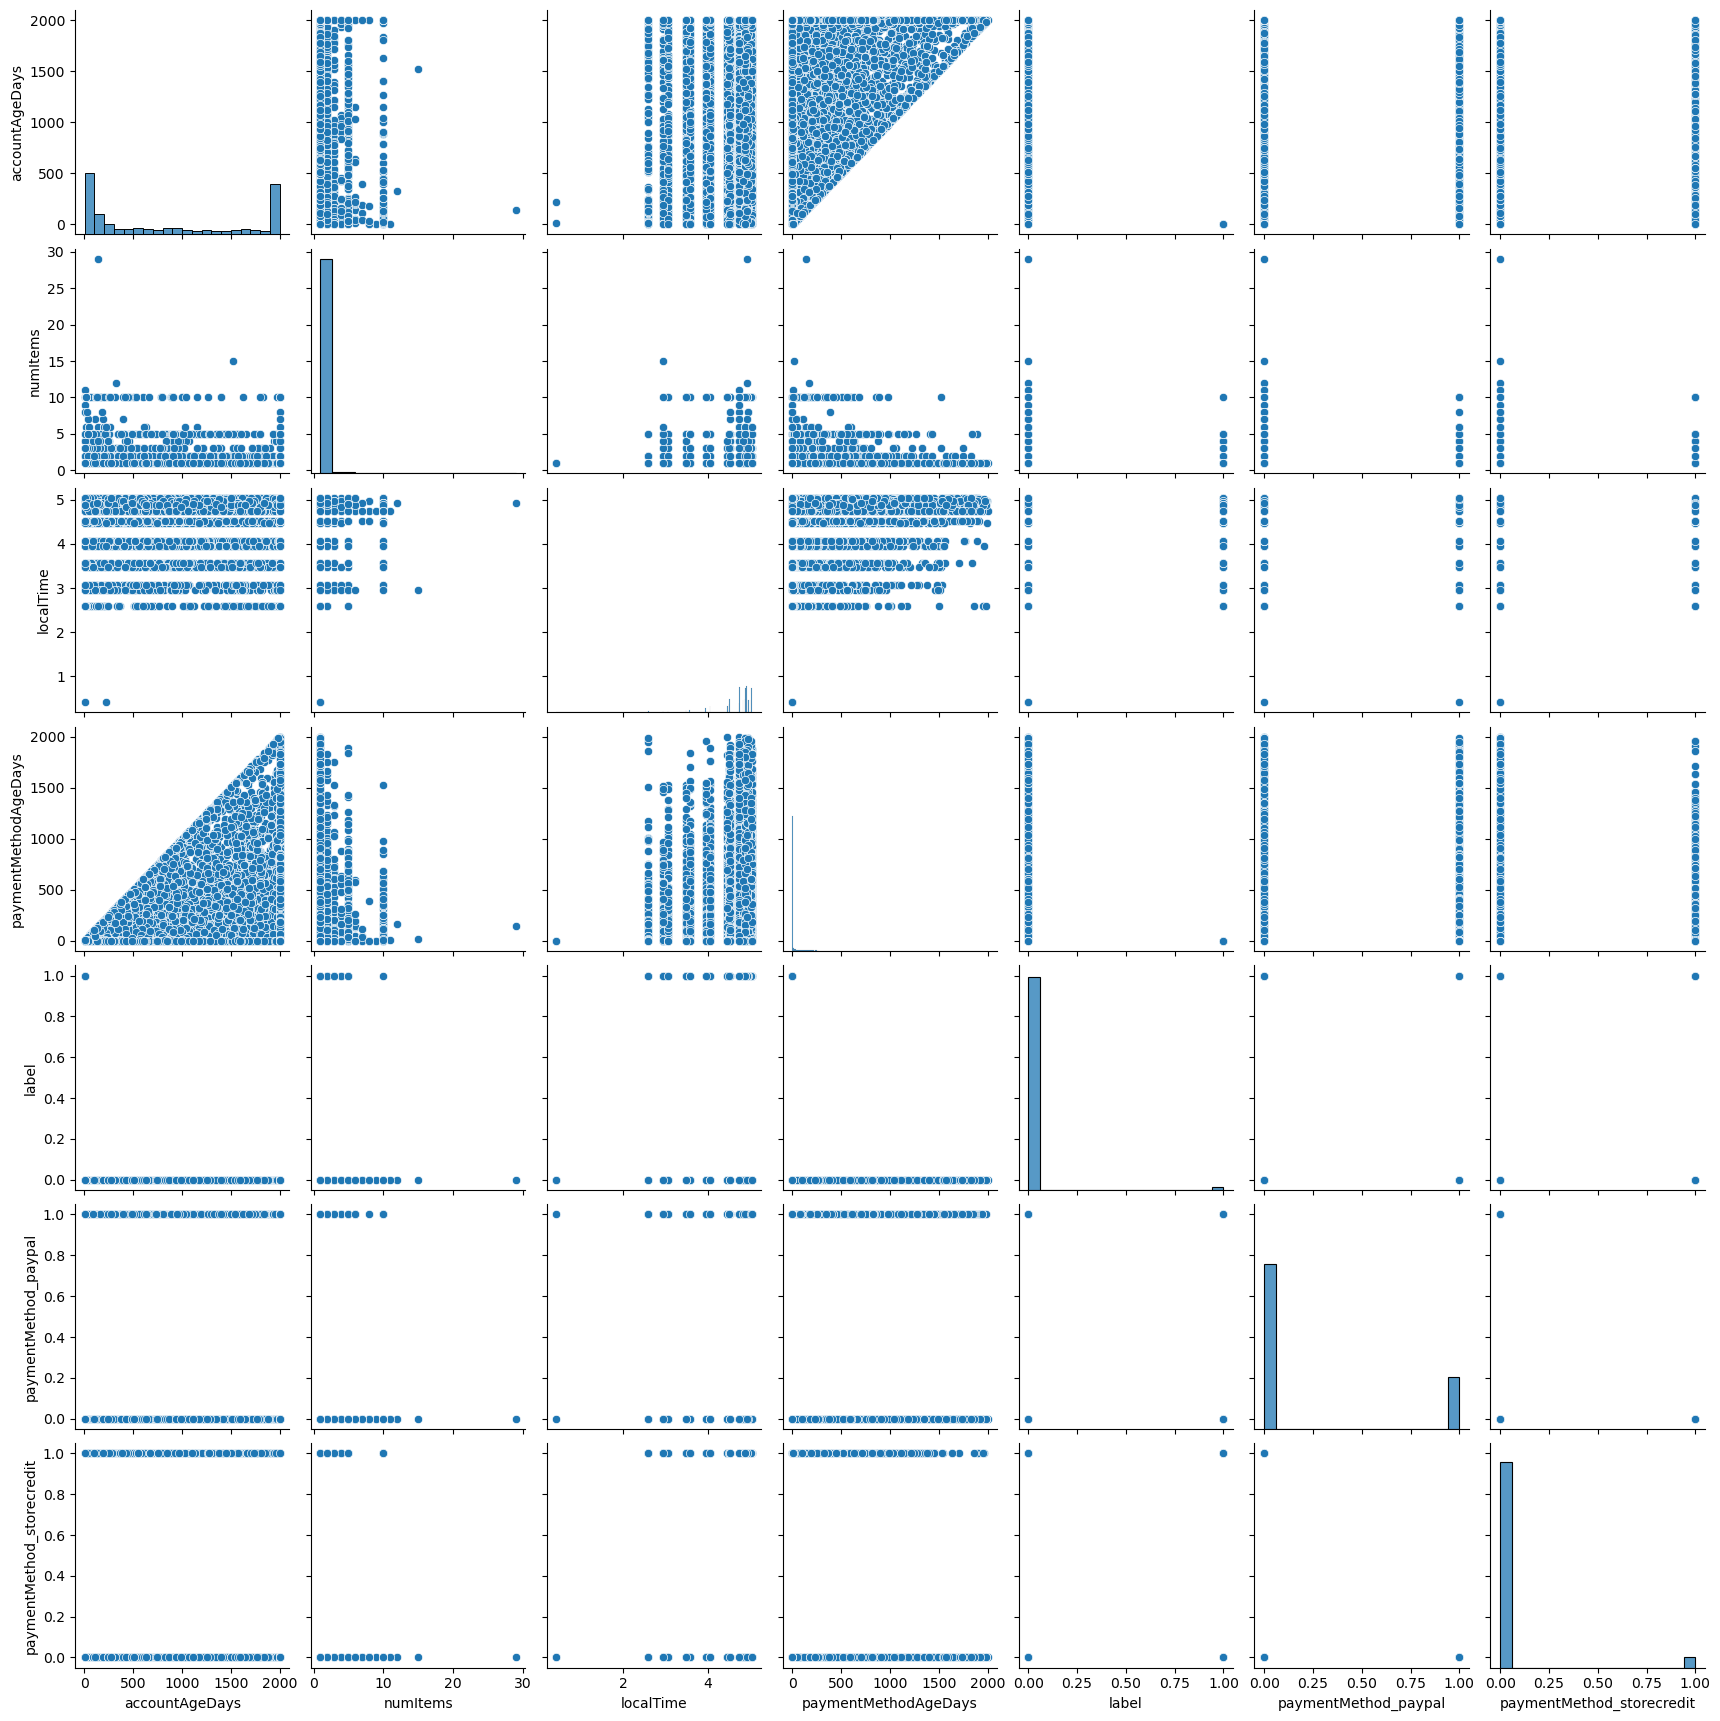

In [10]:
sns.pairplot(df1)
plt.show()

### Split the dataset into input and Target variables(X and y)

In [11]:
X = df1.drop(columns = ['label'])
y = df1['label']

### Standardise the dataset

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
xcolumns = X.columns

In [15]:
X = scaler.fit_transform(X)

In [16]:
X = pd.DataFrame(X, columns = xcolumns)

In [17]:
X.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_paypal,paymentMethod_storecredit
0,-1.029556,-0.1495,-0.007268,-0.333032,1.793308,-0.226504
1,-0.164721,-0.1495,-0.015227,-0.432497,-0.557629,4.414934
2,-0.015612,-0.1495,0.444546,-0.432497,-0.557629,-0.226504
3,-0.440574,-0.1495,0.355484,-0.432497,-0.557629,-0.226504
4,1.419567,-0.1495,0.751749,-0.432497,-0.557629,-0.226504


### Split the data into training and testing set

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 100)

### Create a KNN Model and Train it with n_neigbors = 1

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model = KNeighborsClassifier(n_neighbors=1)

In [22]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Check the score of our model

In [23]:
model.score(X_train,y_train)

1.0

### Make predictions using X_test

In [24]:
y_pred = model.predict(X_test)

### Check accuracy score

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
accuracy_score(y_test,y_pred)

0.9977904308659812

### Create confusion matrix and classification report

In [27]:
confusion_matrix(y_test,y_pred)

array([[11586,    12],
       [   14,   155]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11598
           1       0.93      0.92      0.92       169

    accuracy                           1.00     11767
   macro avg       0.96      0.96      0.96     11767
weighted avg       1.00      1.00      1.00     11767



### Choosing a K value

In [29]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


In [30]:
len(error_rate)

39

### Now create the following  plot to visualise the error rate

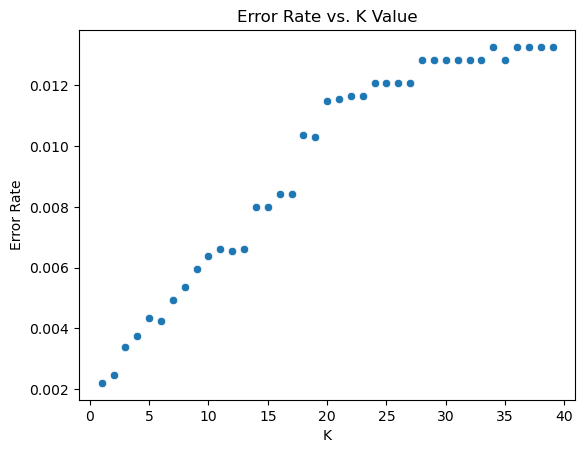

In [31]:
sns.scatterplot(x = range(1,40), y = error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### Retrain the model with new K value

In [32]:
from sklearn import metrics

WITH K=1


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11598
           1       0.93      0.92      0.92       169

    accuracy                           1.00     11767
   macro avg       0.96      0.96      0.96     11767
weighted avg       1.00      1.00      1.00     11767



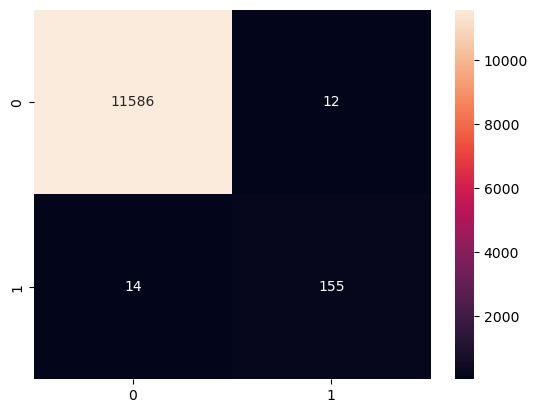

accuracy_score of our model is : 0.9977904308659812


In [33]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(metrics.classification_report(y_test,pred))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

print('accuracy_score of our model is :', metrics.accuracy_score(pred, y_test))

***